In [72]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [73]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [74]:
# Normalize the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
X_train = train_data / std
X_test = (test_data - mean) / std
y_train = train_labels
y_test = test_labels

print(X_test.shape)
print(y_test.shape)

(102, 13)
(102,)


In [87]:
from keras import layers

# Training using k-fold validation
epochs = 140
k = 4
batch_size = 16
partition_size = int(len(X_train) / k)
total_history = []

for i in range(k):
  X_val = X_train[i * partition_size: (i+1) * partition_size]
  y_val = y_train[i * partition_size: (i+1) * partition_size]
  X_iter = np.concatenate(
      (X_train[:i * partition_size], X_train[(i+1) * partition_size:]), axis=0

  )
  y_iter = np.concatenate(
      (y_train[:i * partition_size], y_train[(i+1) * partition_size:]), axis=0
  )

  model = tf.keras.Sequential(
    [layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)]
  )

  model.compile(
      optimizer="rmsprop",
      loss="mse",
      metrics=["mae"]
  )

  history = model.fit(X_iter, y_iter, batch_size=batch_size, epochs=epochs, validation_data=[X_val, y_val])
  val_mse, val_mae = model.evaluate(X_val, y_val)
  # total_history.append(val_mae)
  total_history.append(history.history['val_mae'])

Epoch 1/140
19/19 [==============================] - 1s 12ms/step - loss: 522.7402 - mae: 21.0995 - val_loss: 439.7329 - val_mae: 18.9076
Epoch 2/140
19/19 [==============================] - 0s 5ms/step - loss: 397.4944 - mae: 18.1004 - val_loss: 301.4963 - val_mae: 15.2886
Epoch 3/140
19/19 [==============================] - 0s 5ms/step - loss: 263.8994 - mae: 14.1389 - val_loss: 172.9329 - val_mae: 10.9173
Epoch 4/140
19/19 [==============================] - 0s 4ms/step - loss: 150.7969 - mae: 9.9038 - val_loss: 85.5189 - val_mae: 6.9532
Epoch 5/140
19/19 [==============================] - 0s 4ms/step - loss: 83.5341 - mae: 7.0184 - val_loss: 51.2095 - val_mae: 5.0897
Epoch 6/140
19/19 [==============================] - 0s 4ms/step - loss: 51.6262 - mae: 5.4339 - val_loss: 36.7241 - val_mae: 4.1166
Epoch 7/140
19/19 [==============================] - 0s 4ms/step - loss: 36.6621 - mae: 4.5114 - val_loss: 29.6329 - val_mae: 3.6035
Epoch 8/140
19/19 [==============================] - 0s

KeyboardInterrupt: ignored

In [ ]:
avg_history = [np.mean([x[i] for x in total_history]) for i in range(epochs)]

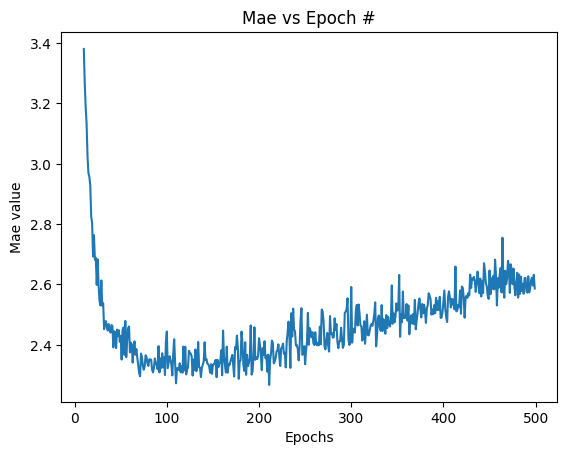

In [86]:
plt.plot(np.arange(epochs)[10:], avg_history[10:])
plt.xlabel("Epochs")
plt.ylabel("Mae value")
plt.title("Mae vs Epoch #")
plt.show()

In [90]:
model = tf.keras.Sequential(
    [layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)]
  )

model.compile(
      optimizer="rmsprop",
      loss="mse",
      metrics=["mae"]
  )

history = model.fit(X_test, y_test, batch_size=16, epochs=140)
test_mse, test_mae_score = model.evaluate(X_test, y_test)
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {test_mae_score}")

Epoch 1/140
7/7 [==============================] - 2s 6ms/step - loss: 581.9835 - mae: 22.3568
Epoch 2/140
7/7 [==============================] - 0s 5ms/step - loss: 531.7834 - mae: 21.2479
Epoch 3/140
7/7 [==============================] - 0s 5ms/step - loss: 486.2934 - mae: 20.1774
Epoch 4/140
7/7 [==============================] - 0s 3ms/step - loss: 438.9646 - mae: 19.0107
Epoch 5/140
7/7 [==============================] - 0s 7ms/step - loss: 388.5602 - mae: 17.6839
Epoch 6/140
7/7 [==============================] - 0s 5ms/step - loss: 336.0636 - mae: 16.2252
Epoch 7/140
7/7 [==============================] - 0s 5ms/step - loss: 284.6015 - mae: 14.7613
Epoch 8/140
7/7 [==============================] - 0s 4ms/step - loss: 236.7057 - mae: 13.3187
Epoch 9/140
7/7 [==============================] - 0s 3ms/step - loss: 190.0728 - mae: 11.7353
Epoch 10/140
7/7 [==============================] - 0s 5ms/step - loss: 152.5089 - mae: 10.3833
Epoch 11/140
7/7 [==============================]

In [91]:
model.predict(X_test[:10])

1/1 [==============================] - 0s 137ms/step


array([[ 8.027205],
       [19.15146 ],
       [22.077993],
       [29.189146],
       [24.897112],
       [23.26381 ],
       [27.412079],
       [21.518854],
       [20.94055 ],
       [22.444666]], dtype=float32)